# Machine Learning Application in Finance
# &emsp; BAN437, Summer 2021

### &emsp; &emsp; Professor: Philip Sun
### &emsp; &emsp; Email: philip.sun@faculty.hult.edu
### &emsp; &emsp; Last Modified: 5/21/2021

___

## Chapter 3: Supervised Learning
## 3.2 PCA Example (Not in Text Book)

In [ ]:
#!pip install mglearn yfinance
#!pip install joblib==1.1.1

In [ ]:
# import modules
import math
import numpy as np
import pandas as pd
import yfinance as yf #you should have this installed from Class 1.
import datetime as dt
import mglearn
import matplotlib as plt

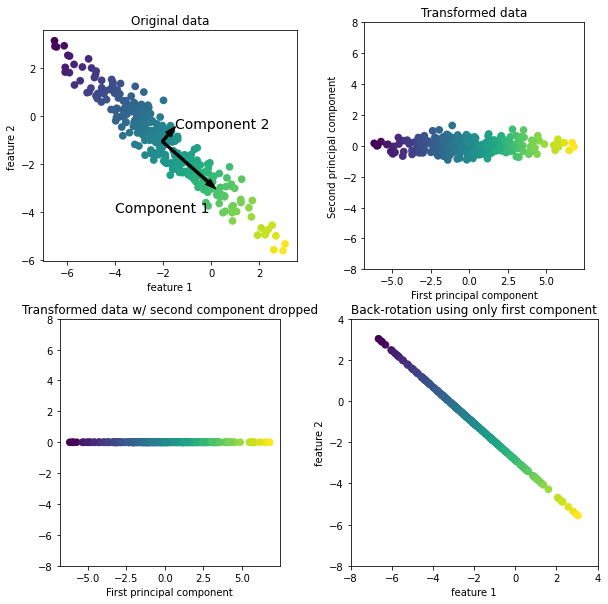

In [ ]:
# Generate Plot for the class slides
mglearn.plots.plot_pca_illustration()  # "Introduction to Machine Learning with Python" by Muller and Guido

In [ ]:
# Read the Federal Reserve Constant Maturity Dataset
# Please download 'FRB_H15.csv' from my course page and save in the same directory as the python notebook

csv_file='FRB_H15.csv'
df_cmt=pd.read_csv(csv_file, index_col=None)
df_cmt

,Time Period,CM03,CM06,CY01,CY02,CY03,CY05,CY07,CY10,CY20,CY30
0,9/1/1981,17.01,17.17,17.06,16.78,16.57,16.12,15.71,15.41,15.09,14.70
1,9/2/1981,16.65,17.32,17.16,16.78,16.43,16.09,15.75,15.40,15.11,14.70
2,9/3/1981,16.96,17.42,17.31,16.90,16.48,16.14,15.78,15.48,15.21,14.82
3,9/4/1981,16.64,17.37,17.24,16.89,16.52,16.17,15.86,15.51,15.24,14.84
4,9/8/1981,16.54,17.43,17.29,16.95,16.56,16.23,15.92,15.59,15.36,14.99
...,...,...,...,...,...,...,...,...,...,...,...
9878,3/10/2021,0.04,0.06,0.08,0.16,0.32,0.80,1.20,1.53,2.15,2.24
9879,3/11/2021,0.04,0.05,0.08,0.14,0.31,0.78,1.20,1.54,2.18,2.29
9880,3/12/2021,0.04,0.06,0.09,0.14,0.34,0.85,1.30,1.64,2.31,2.40
9881,3/15/2021,0.04,0.06,0.08,0.14,0.33,0.84,1.28,1.62,2.27,2.37


In [ ]:
# Here I am just doing some transformation for Time Period column, before using time as index.

df_cmt['Time Period']=df_cmt['Time Period'].apply(pd.to_datetime)
df_cmt.set_index('Time Period',inplace=True, drop=True)
df_cmt

,CM03,CM06,CY01,CY02,CY03,CY05,CY07,CY10,CY20,CY30
Time Period,,,,,,,,,,
1981-09-01,17.01,17.17,17.06,16.78,16.57,16.12,15.71,15.41,15.09,14.70
1981-09-02,16.65,17.32,17.16,16.78,16.43,16.09,15.75,15.40,15.11,14.70
1981-09-03,16.96,17.42,17.31,16.90,16.48,16.14,15.78,15.48,15.21,14.82
1981-09-04,16.64,17.37,17.24,16.89,16.52,16.17,15.86,15.51,15.24,14.84
1981-09-08,16.54,17.43,17.29,16.95,16.56,16.23,15.92,15.59,15.36,14.99
...,...,...,...,...,...,...,...,...,...,...
2021-03-10,0.04,0.06,0.08,0.16,0.32,0.80,1.20,1.53,2.15,2.24
2021-03-11,0.04,0.05,0.08,0.14,0.31,0.78,1.20,1.54,2.18,2.29
2021-03-12,0.04,0.06,0.09,0.14,0.34,0.85,1.30,1.64,2.31,2.40


In [ ]:
# now we run principal components analysis on the yields
# First let's normalize the yields
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_cmt)
cmt_scaled = scaler.transform(df_cmt)

from sklearn.decomposition import PCA
#  Follow the professor fill in blank ________ below

# keep the first 3 principal components
pca = PCA(n_components=3)

# fit PCA model to breast cancer data
pca.fit(cmt_scaled)

# transform, i.e. rotate yield onto the first 3 principal components
yc_pca = pca.transform(cmt_scaled)

print("yield data shape: {}".format(str(df_cmt.shape)))
print("pca transformed yc shape: {}".format(str(yc_pca.shape)))

yield data shape: (9883, 10)
pca transformed yc shape: (9883, 3)


In [ ]:
pd.DataFrame(yc_pca, columns=['PC1','PC2','PC3'], index=df_cmt.index)

,PC1,PC2,PC3
Time Period,,,
1981-09-01,10.827848,1.088302,-0.354413
1981-09-02,10.805632,1.060414,-0.326827
1981-09-03,10.913706,1.093046,-0.380628
1981-09-04,10.893438,1.022012,-0.320706
1981-09-08,10.951772,0.971945,-0.318364
...,...,...,...
2021-03-10,-3.991646,0.137310,-0.013227
2021-03-11,-3.987629,0.122414,-0.027034
2021-03-12,-3.930840,0.073225,-0.036350


In [ ]:
df_pcacomponents=pd.DataFrame(pca.components_, index=['Level','Slope','Curvature'], columns=df_cmt.columns)
df_pcacomponents

,CM03,CM06,CY01,CY02,CY03,CY05,CY07,CY10,CY20,CY30
Level,0.312566,0.314189,0.316126,0.318595,0.319463,0.319504,0.318592,0.316964,0.314008,0.312157
Slope,0.437604,0.399768,0.327549,0.183781,0.083166,-0.088087,-0.192815,-0.292657,-0.400519,-0.457938
Curvature,-0.508209,-0.245284,0.045456,0.342092,0.417518,0.348998,0.217093,0.012323,-0.285219,-0.371098


Text(0.5, 0, 'Yied Curve Maturity Points')

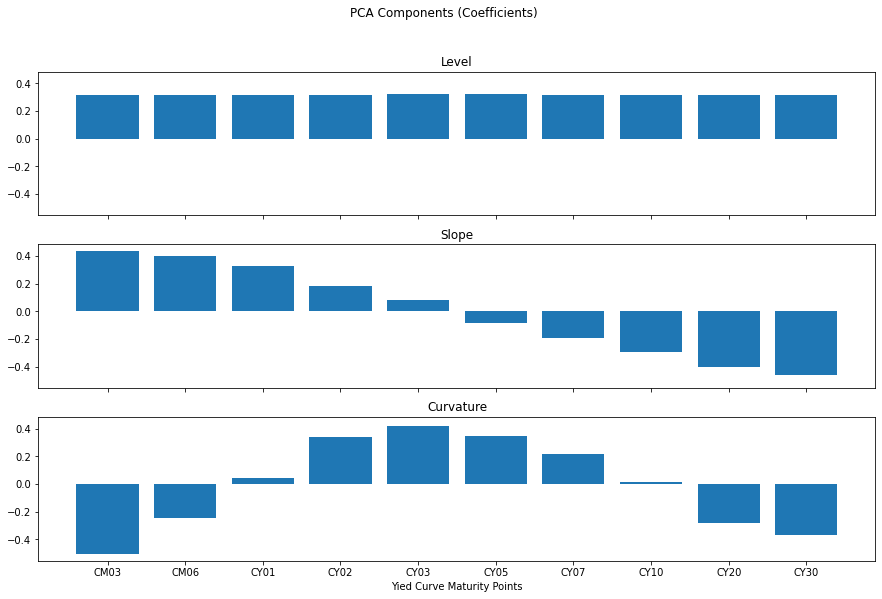

In [ ]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline 

#plt.figure(figsize=(10,7))
numsub=len(df_pcacomponents.index)
fig, axs = plt.subplots(numsub, sharex=True, sharey=True)
fig.suptitle('PCA Components (Coefficients)')
fig.set_figheight(3*numsub)
fig.set_figwidth(15)

for i in range(numsub):
    axs[i].bar(df_pcacomponents.columns, df_pcacomponents.iloc[i,:])
    axs[i].title.set_text(df_pcacomponents.index[i])
plt.xlabel('Yied Curve Maturity Points')

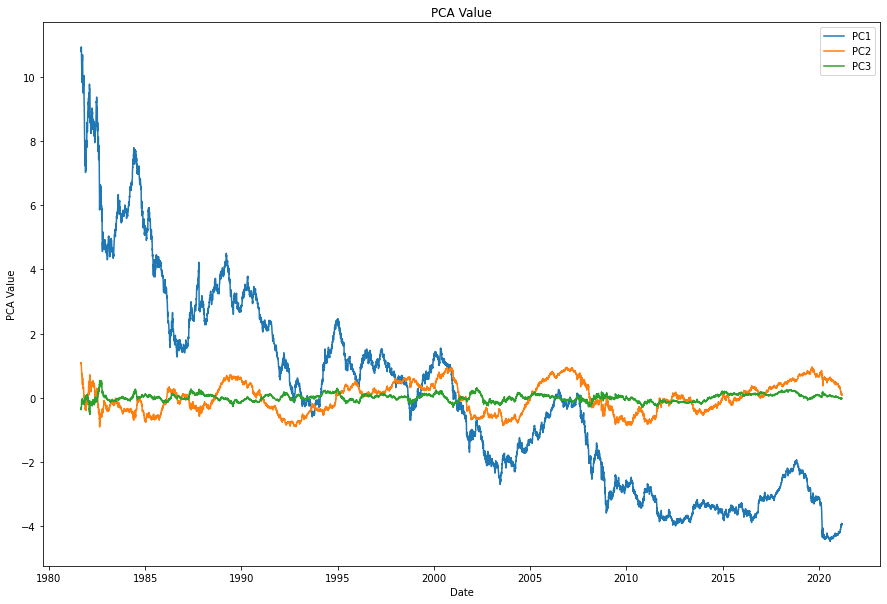

In [ ]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(15,10))

plt.plot(pd.DataFrame(yc_pca, columns=['PC1','PC2','PC3'], index=df_cmt.index))
#plt.plot(datetra, p_tree_insample)
#plt.plot(dateval, p_tree_prediction)
#plt.plot(datetra, p_lr_insample)
#plt.plot(dateval, p_lr_prediction)

plt.title('PCA Value')
plt.xlabel('Date')
plt.ylabel('PCA Value')
plt.legend(['PC1','PC2','PC3'])